# This example shows how to create a bunch from an arbitrary beam matrix

In [1]:
%plot -f SVG

In [2]:
RF_Track;


RF-Track, version 2.3.3a0

Copyright (C) 2016-2025 CERN, Geneva, Switzerland. All rights reserved.

Author and contact:
 Andrea Latina <andrea.latina@cern.ch>
 BE-ABP Group
 CERN
 CH-1211 GENEVA 23
 SWITZERLAND

This software is distributed under a CERN proprietary software
license in the hope that it will be useful, but WITHOUT ANY WARRANTY;
not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

See the COPYRIGHT and LICENSE files at the top-level directory of
the RF-Track download area: https://gitlab.cern.ch/rf-track

RF-Track was compiled with GSL-2.7 and fftw-3.3.10



### Create a 50 pC bunch at 100 MeV/$c$, using 1000 macroparticles

In [3]:
% Define key quantities
P_ref = 100; % MeV/c reference momentum
Q = 50 * RF_Track.pC; % e, total bunch charge

In [4]:
Q / RF_Track.pC

ans = 50.000


Creates particles according to a random Gaussian distribution in X and Y, and 0 angles

In [5]:
N = 1000; % number of macro particles

% Initialise vector columns
O = zeros (N,1); % define a column vector of zeros
I = ones (N,1); % define a column vector of ones
X = randn (N,1); % mm, column vector of Gaussian-distributed positions
Y = randn (N,1); % mm, column vector of Gaussian-distributed positions

% create beam matrix with the phase space
M = [ X O Y O O P_ref*I ]; % Bunch6d %x %xp %y %yp %t %P

ans =

     0.0864          0     0.6687          0          0   100.0000
    -0.1461          0    -0.8975          0          0   100.0000
    -0.6522          0    -1.1205          0          0   100.0000
     0.7851          0    -0.1161          0          0   100.0000
    -1.5190          0    -0.3065          0          0   100.0000
    -1.0715          0     0.4768          0          0   100.0000
     0.2375          0     0.1771          0          0   100.0000
    -0.5101          0    -0.2970          0          0   100.0000
    -0.9328          0    -0.9047          0          0   100.0000
     0.7888          0    -0.0263          0          0   100.0000



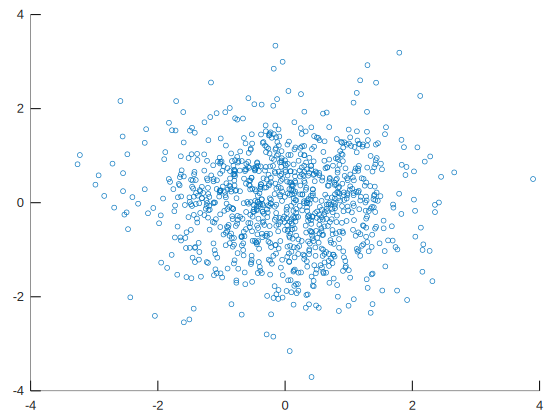

In [6]:
M( 1:10, :)
scatter(X,Y)

In [7]:
dt = 10 * RF_Track.ns % mm/c

dt = 2997.9


In [8]:
dt / RF_Track.us

ans = 0.010000


To create a bunch, use the RF-Track Bunch6d constructor, which takes
* the particle mass, in MeV/c^2
* the bunch charge, expressed as number of particles
* the charge of the single particle in units of $e$
* the beam matrix $M$

In [9]:
m_electrons = RF_Track.electronmass

m_electrons = 0.5110


In [10]:
B0 = Bunch6d (RF_Track.electronmass, Q, -1, M);

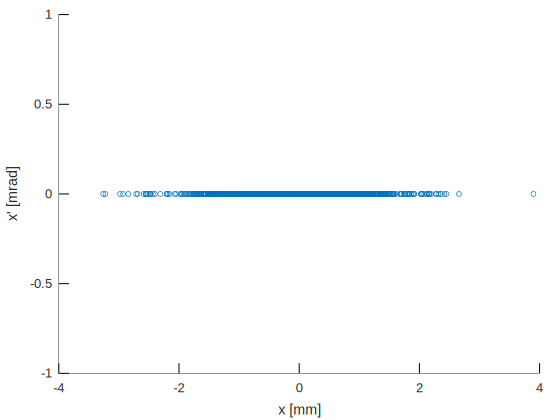

In [11]:
figure
M0 = B0.get_phase_space ('%x %xp %y %yp');
scatter (M0(:,1), M0(:,2));
xlabel ('x [mm]');
ylabel ('x'' [mrad]');

In [12]:
M (:,2) += 1;

In [13]:
B0.set_phase_space(M)